Import River

In [2]:
pip install river

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 45.4 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


2. Use SDV to generate synthetic data off of models

In [3]:
%pip install sdv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.6/139.6 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 99.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.6/187.6 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 71.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.

In [ ]:
from river.drift import ADWIN
from river.datasets import Bikes
import pandas as pd
from sdv.single_table import GaussianCopulaSynthesizer
from sdv.metadata import SingleTableMetadata

# Step 1: Prepare Original Dataset
bikes = Bikes()
data_list = [x for x, y in bikes.take(100)]  # Collect 100 original samples
df_original = pd.DataFrame(data_list)

# Step 2: Train an SDV Model and Generate Synthetic Data
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(df_original)

synthesizer = GaussianCopulaSynthesizer(metadata)
synthesizer.fit(df_original)
df_synthetic = synthesizer.sample(100)  # Generate 100 synthetic samples

# Step 3: Select a Column for Drift Detection
feature_name = "clouds"  # Choose a numerical feature for drift detection

# Step 4: Initialize Drift Detector
drift_detector = ADWIN()

# Step 5: Track Drift and Store Detected Points
drift_points = []  # To store the indices where drift is detected

# Step 6: Feed Synthetic Data into Drift Detector (Comparing Only to Synthetic Past)
for i, value in enumerate(df_synthetic[feature_name]):
    drift_detector.update(value)
    if drift_detector.drift_detected:
        print(f"🚨 Drift detected at synthetic sample {i+1}, value: {value}")


/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:119: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:104: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


3. Use River to determine concept drift in the synthetic data

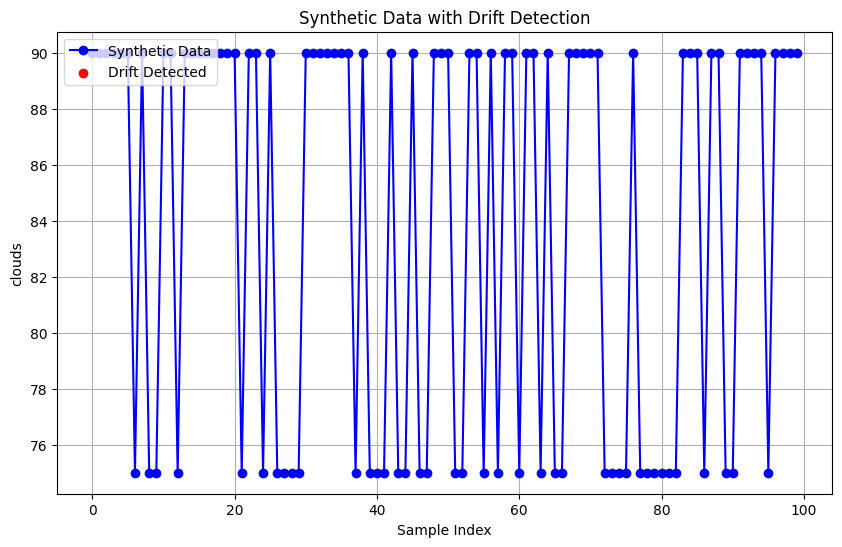

In [ ]:
import matplotlib.pyplot as plt


# Step 7: Visualize Synthetic Data and Drift Points
plt.figure(figsize=(10, 6))
plt.plot(df_synthetic[feature_name], label='Synthetic Data', color='blue', marker='o')
plt.scatter(drift_points, df_synthetic[feature_name].iloc[drift_points], color='red', label='Drift Detected', zorder=5)

plt.title("Synthetic Data with Drift Detection")
plt.xlabel("Sample Index")
plt.ylabel(feature_name)
plt.legend(loc="upper left")
plt.grid(True)
plt.show()


Sudden Artificial Drift Detection

/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:119: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:104: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


🚨 Drift detected at synthetic sample 64, value: 95


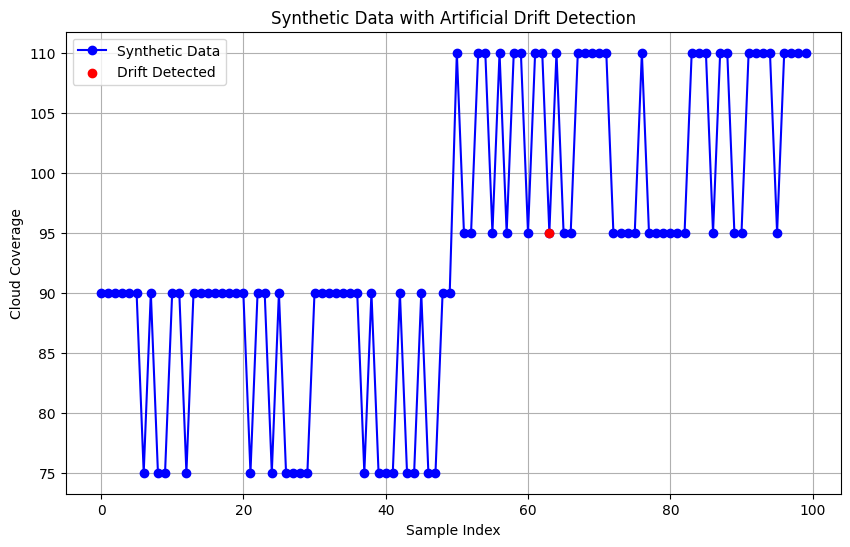

In [ ]:
import matplotlib.pyplot as plt
from river.drift import ADWIN
from river.datasets import Bikes
import pandas as pd
import numpy as np
from sdv.single_table import GaussianCopulaSynthesizer
from sdv.metadata import SingleTableMetadata

# Step 1: Prepare Original Dataset
bikes = Bikes()
data_list = [x for x, y in bikes.take(100)]  # Collect 100 original samples
df_original = pd.DataFrame(data_list)

# Step 2: Train an SDV Model and Generate Synthetic Data
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(df_original)

synthesizer = GaussianCopulaSynthesizer(metadata)
synthesizer.fit(df_original)
df_synthetic = synthesizer.sample(100)  # Generate 100 synthetic samples

# Step 3: Select a Column for Drift Detection
feature_name = "clouds"  # Choose a numerical feature for drift detection

# Step 4: Introduce Artificial Drift (Modify second half of data)
df_synthetic.loc[50:, feature_name] += 20  # Increase cloud coverage artificially

# Step 5: Initialize Drift Detector
drift_detector = ADWIN()

# Step 6: Track Drift and Store Detected Points
drift_points = []

for i, value in enumerate(df_synthetic[feature_name]):
    drift_detector.update(value)
    if drift_detector.drift_detected:
        print(f"🚨 Drift detected at synthetic sample {i+1}, value: {value}")
        drift_points.append(i)

# Step 7: Visualize Synthetic Data and Drift
plt.figure(figsize=(10, 6))
plt.plot(df_synthetic[feature_name], label='Synthetic Data', color='blue', marker='o')
plt.scatter(drift_points, df_synthetic[feature_name].iloc[drift_points], color='red', label='Drift Detected', zorder=5)

plt.title("Synthetic Data with Artificial Drift Detection")
plt.xlabel("Sample Index")
plt.ylabel("Cloud Coverage")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()


gradual concept drift detection

/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:119: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:104: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(
<ipython-input-25-8e9915bd587c>:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '75.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_synthetic.loc[i, feature_name] += (i - drift_start) * drift_factor  # Gradual increase


🚨 Drift detected at synthetic sample 96, value: 97.5


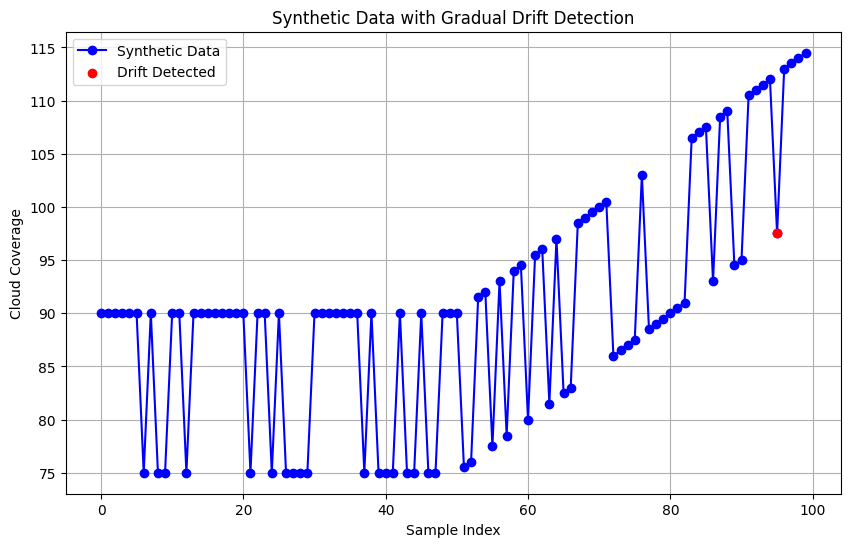

In [ ]:
import matplotlib.pyplot as plt
from river.drift import ADWIN
from river.datasets import Bikes
import pandas as pd
import numpy as np
from sdv.single_table import GaussianCopulaSynthesizer
from sdv.metadata import SingleTableMetadata

# Step 1: Prepare Original Dataset
bikes = Bikes()
data_list = [x for x, y in bikes.take(100)]  # Collect 100 original samples
df_original = pd.DataFrame(data_list)

# Step 2: Train an SDV Model and Generate Synthetic Data
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(df_original)

synthesizer = GaussianCopulaSynthesizer(metadata)
synthesizer.fit(df_original)
df_synthetic = synthesizer.sample(100)  # Generate 100 synthetic samples

# Step 3: Select a Column for Drift Detection
feature_name = "clouds"  # Choose a numerical feature for drift detection

# Step 4: Introduce Gradual Drift
drift_start = 50  # Start introducing drift at index 50
drift_factor = 0.5  # Small incremental change

for i in range(drift_start, len(df_synthetic)):
    df_synthetic.loc[i, feature_name] += (i - drift_start) * drift_factor  # Gradual increase

# Step 5: Initialize Drift Detector
drift_detector = ADWIN()

# Step 6: Track Drift and Store Detected Points
drift_points = []

for i, value in enumerate(df_synthetic[feature_name]):
    drift_detector.update(value)
    if drift_detector.drift_detected:
        print(f"🚨 Drift detected at synthetic sample {i+1}, value: {value}")
        drift_points.append(i)

# Step 7: Visualize Synthetic Data and Drift
plt.figure(figsize=(10, 6))
plt.plot(df_synthetic[feature_name], label='Synthetic Data', color='blue', marker='o')
plt.scatter(drift_points, df_synthetic[feature_name].iloc[drift_points], color='red', label='Drift Detected', zorder=5)

plt.title("Synthetic Data with Gradual Drift Detection")
plt.xlabel("Sample Index")
plt.ylabel("Cloud Coverage")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()


Random Noise Drift detection

/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:119: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:104: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(
<ipython-input-12-bce2fa664426>:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '87.49080237694724' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_synthetic.loc[i, feature_name] += np.random.uniform(-noise_amplitude, noise_amplitude)


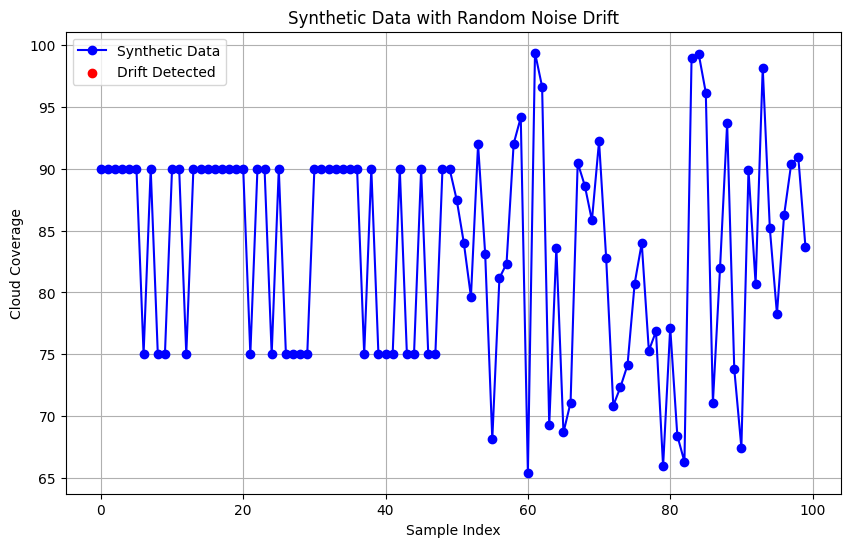

In [12]:
import matplotlib.pyplot as plt
from river.drift import ADWIN
from river.datasets import Bikes
import pandas as pd
import numpy as np
from sdv.single_table import GaussianCopulaSynthesizer
from sdv.metadata import SingleTableMetadata

# Step 1: Prepare Original Dataset
bikes = Bikes()
data_list = [x for x, y in bikes.take(100)]  # Collect 100 original samples
df_original = pd.DataFrame(data_list)

# Step 2: Train an SDV Model and Generate Synthetic Data
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(df_original)

synthesizer = GaussianCopulaSynthesizer(metadata)
synthesizer.fit(df_original)
df_synthetic = synthesizer.sample(100)  # Generate 100 synthetic samples

# Step 3: Select a Column for Drift Detection
feature_name = "clouds"  # Choose a numerical feature for drift detection

# Step 4: Introduce Random Noise Drift
np.random.seed(42)  # Ensures reproducibility
noise_amplitude = 10  # Adjust for stronger/weaker noise

for i in range(50, len(df_synthetic)):
    df_synthetic.loc[i, feature_name] += np.random.uniform(-noise_amplitude, noise_amplitude)

# Step 5: Initialize Drift Detector
drift_detector = ADWIN()
drift_points = []

# Step 6: Detect Drift
for i, value in enumerate(df_synthetic[feature_name]):
    drift_detector.update(value)
    if drift_detector.drift_detected:
        drift_points.append(i)
        print(f"🚨 Drift detected at index {i+1}, value: {value}")

# Step 7: Visualize
plt.figure(figsize=(10, 6))
plt.plot(df_synthetic[feature_name], label='Synthetic Data', color='blue', marker='o')
plt.scatter(drift_points, df_synthetic[feature_name].iloc[drift_points], color='red', label='Drift Detected', zorder=5)
plt.title("Synthetic Data with Random Noise Drift")
plt.xlabel("Sample Index")
plt.ylabel("Cloud Coverage")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()


random noise drift with more senstive ADWIN algorithm


/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:119: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:104: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(
<ipython-input-16-d5e6b02cdb58>:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '87.49080237694724' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_synthetic.loc[i, feature_name] += np.random.uniform(-noise_amplitude, noise_amplitude)


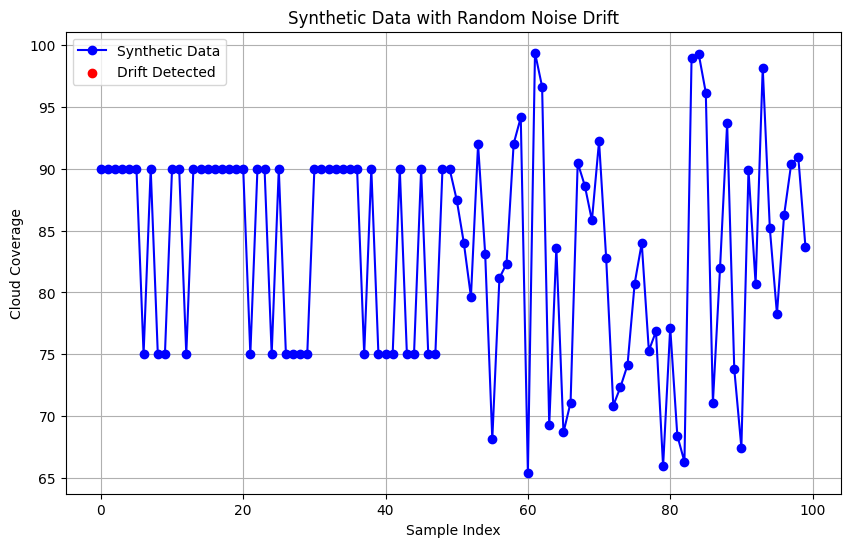

In [16]:
import matplotlib.pyplot as plt
from river.drift import ADWIN
from river.datasets import Bikes
import pandas as pd
import numpy as np
from sdv.single_table import GaussianCopulaSynthesizer
from sdv.metadata import SingleTableMetadata

# Step 1: Prepare Original Dataset
bikes = Bikes()
data_list = [x for x, y in bikes.take(100)]  # Collect 100 original samples
df_original = pd.DataFrame(data_list)

# Step 2: Train an SDV Model and Generate Synthetic Data
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(df_original)

synthesizer = GaussianCopulaSynthesizer(metadata)
synthesizer.fit(df_original)
df_synthetic = synthesizer.sample(100)  # Generate 100 synthetic samples

# Step 3: Select a Column for Drift Detection
feature_name = "clouds"  # Choose a numerical feature for drift detection

# Step 4: Introduce Random Noise Drift
np.random.seed(42)  # Ensures reproducibility
noise_amplitude = 10  # Adjust for stronger/weaker noise

for i in range(50, len(df_synthetic)):
    df_synthetic.loc[i, feature_name] += np.random.uniform(-noise_amplitude, noise_amplitude)

# Step 5: Initialize Drift Detector
drift_detector = ADWIN(delta=0.00001)  # Very sensitive
drift_points = []

# Step 6: Detect Drift
for i, value in enumerate(df_synthetic[feature_name]):
    drift_detector.update(value)
    if drift_detector.drift_detected:
        drift_points.append(i)
        print(f"🚨 Drift detected at index {i+1}, value: {value}")

# Step 7: Visualize
plt.figure(figsize=(10, 6))
plt.plot(df_synthetic[feature_name], label='Synthetic Data', color='blue', marker='o')
plt.scatter(drift_points, df_synthetic[feature_name].iloc[drift_points], color='red', label='Drift Detected', zorder=5)
plt.title("Synthetic Data with Random Noise Drift")
plt.xlabel("Sample Index")
plt.ylabel("Cloud Coverage")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()


Seasonal Drift

/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:119: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:104: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(
<ipython-input-17-7b8d8d99314c>:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '98.51141009169893' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_synthetic.loc[i, feature_name] += amplitude * np.sin((i - 50) * (2 * np.pi / period))


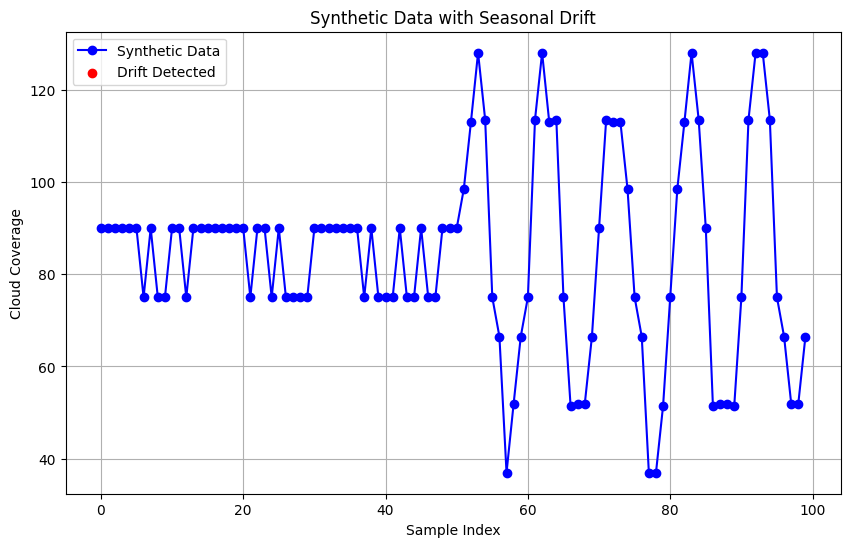

In [17]:
import matplotlib.pyplot as plt
from river.drift import ADWIN
from river.datasets import Bikes
import pandas as pd
import numpy as np
from sdv.single_table import GaussianCopulaSynthesizer
from sdv.metadata import SingleTableMetadata

# Step 1: Prepare Original Dataset
bikes = Bikes()
data_list = [x for x, y in bikes.take(100)]  # Collect 100 original samples
df_original = pd.DataFrame(data_list)

# Step 2: Train an SDV Model and Generate Synthetic Data
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(df_original)

synthesizer = GaussianCopulaSynthesizer(metadata)
synthesizer.fit(df_original)
df_synthetic = synthesizer.sample(100)  # Generate 100 synthetic samples

# Step 3: Select a Column for Drift Detection
feature_name = "clouds"  # Choose a numerical feature for drift detection

# Step 4: Introduce Seasonal Drift
period = 10  # Adjust for faster/slower waves
amplitude = 15  # Adjust for stronger/weaker seasonal effects

for i in range(50, len(df_synthetic)):
    df_synthetic.loc[i, feature_name] += amplitude * np.sin((i - 50) * (2 * np.pi / period))

# Step 5: Initialize Drift Detector
drift_detector = ADWIN()
drift_points = []

# Step 6: Detect Drift
for i, value in enumerate(df_synthetic[feature_name]):
    drift_detector.update(value)
    if drift_detector.drift_detected:
        drift_points.append(i)
        print(f"🚨 Drift detected at index {i+1}, value: {value}")

# Step 7: Visualize
plt.figure(figsize=(10, 6))
plt.plot(df_synthetic[feature_name], label='Synthetic Data', color='blue', marker='o')
plt.scatter(drift_points, df_synthetic[feature_name].iloc[drift_points], color='red', label='Drift Detected', zorder=5)
plt.title("Synthetic Data with Seasonal Drift")
plt.xlabel("Sample Index")
plt.ylabel("Cloud Coverage")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()


Gradual drift plus noise

🚨 Drift detected at index 95, value: 32.92608954938932


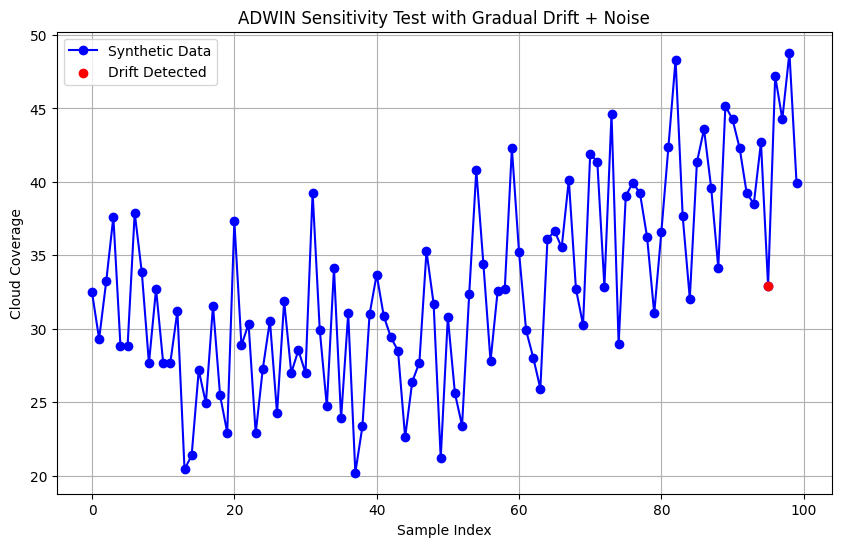

In [15]:
from river.drift import ADWIN
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Generate synthetic data
np.random.seed(42)
n_samples = 100
feature_name = "clouds"

# Baseline data (before drift)
df_synthetic = pd.DataFrame({feature_name: np.random.normal(30, 5, n_samples)})

# Introduce gradual drift with random noise
for i in range(50, n_samples):
    df_synthetic.loc[i, feature_name] += (i - 50) * 0.3 + np.random.uniform(-5, 5)  # Gradual increase + noise

# Initialize a more sensitive ADWIN
drift_detector = ADWIN(delta=0.0001)  # Very sensitive
drift_points = []

# Detect drift
for i, value in enumerate(df_synthetic[feature_name]):
    drift_detector.update(value)
    if drift_detector.drift_detected:
        drift_points.append(i)
        print(f"🚨 Drift detected at index {i}, value: {value}")

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(df_synthetic[feature_name], label="Synthetic Data", color="blue", marker="o")
plt.scatter(drift_points, df_synthetic[feature_name].iloc[drift_points], color="red", label="Drift Detected", zorder=5)
plt.title("ADWIN Sensitivity Test with Gradual Drift + Noise")
plt.xlabel("Sample Index")
plt.ylabel("Cloud Coverage")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()
